<b><p style="font-size: XX-large"><font color = "green">Binary Classification of Drug Users</font></p></b> </div>
<b><p style="font-size: X-large"><font color = "green">Andrew Cai (cai.and@northeastern.edu)</font></p></b> </div>
<b><p style="font-size: X-large"><font color = "green">Joynae Whitehurst (whitehurst.j@northeastern.edu)</font></p></b> </div>
<b><p style="font-size: X-large"><font color = "green">December 13, 2024</font></p></b> </div>

# Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Matplotlib Documentation — Matplotlib 3.8.2 Documentation. matplotlib.org/stable/index.html.
import seaborn as sns
from decimal import Decimal
from sklearn.naive_bayes import ComplementNB, CategoricalNB # “1.9. Naive Bayes.” Scikit-learn, scikit-learn.org/stable/modules/naive_bayes.html.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # “Sklearn.Metrics.Confusion_Matrix.” Scikit-learn, scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html.
from sklearn.metrics import classification_report # “Sklearn.Metrics.Classification_Report.” Scikit-learn, scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html.
from sklearn.model_selection import train_test_split # “Sklearn.Model_Selection.Train_Test_Split.” Scikit-learn, scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.
from sklearn.preprocessing import LabelEncoder # “Sklearn.Preprocessing.LabelEncoder.” Scikit-learn, scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.
from sklearn.svm import SVC # https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html
from sklearn.linear_model import LogisticRegression, Perceptron # “1.1. Linear Models.” Scikit-learn, scikit-learn.org/stable/modules/linear_model.html.
from sklearn.metrics import roc_auc_score, roc_curve #https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.roc_curve.html

import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [2]:
# Load in data as a pandas dataframe
drug_df = pd.read_csv('drug_consumption.csv') 
# Initial metadata
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [3]:
# Quick Preview
drug_df.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


# Data Cleaning and Feature Engineering

Convert the numeric floats into something interpretable

In [4]:
# Converted age
age_convert = {
    -0.95197: '18-24',
    -0.07854: '25-34',	
     0.49788: '35-44',	
     1.09449: '45-54',	
     1.82213: '55-64',	
     2.59171: '65+'
    }

# Converted gender
gender_convert = {
     0.48246: 'Female',
    -0.48246: 'Male'
    }

# Converted education
edu_convert = {
    -2.43591: 'Left School Before 16 years',
    -1.73790: 'Left School at 16 years',
    -1.43719: 'Left School at 17 years',
    -1.22751: 'Left School at 18 years',
    -0.61113: 'Some College, No Certificate Or Degree',
    -0.05921: 'Professional Certificate/Diploma',
     0.45468: 'University Degree',
     1.16365: 'Masters Degree',
     1.98437: 'Doctorate Degree'
    }

# Converted country
ctry_convert = {
    -0.09765: 'Australia',
     0.24923: 'Canada',	
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
     0.21128: 'Republic of Ireland',
     0.96082: 'UK',	
    -0.57009: 'USA'	
    }

# Converted ethnicity
eth_convert = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
     1.90725: 'Mixed-Black/Asian',	
     0.12600: 'Mixed-White/Asian',	
    -0.22166: 'Mixed-White/Black',	
     0.11440: 'Other',
    -0.31685: 'White'
    }

# Converted N Score
n_convert = {
    12:	-3.46436,	
    13:	-3.15735,	
    14:	-2.75696,	
    15:	-2.52197,	
    16:	-2.42317,	
    17:	-2.34360,	
    18:	-2.21844,	
    19:	-2.05048,	
    20:	-1.86962,	
    21:	-1.69163,	
    22:	-1.55078,	
    23:	-1.43907,
    24:	-1.32828,	
    25:	-1.19430,	
    26:	-1.05308,	
    27:	-0.92104,	
    28:	-0.79151,	
    29:	-0.67825,	
    30:	-0.58016,	
    31:	-0.46725,	
    32:	-0.34799,	
    33:	-0.24649,	
    34:	-0.14882,	
    35:	-0.05188,
    36:	0.04257,
    37:	0.13606,	
    38:	0.22393,	
    39:	0.31287,	
    40:	0.41667,	
    41:	0.52135,	
    42:	0.62967,	
    43:	0.73545,	
    44:	0.82562,	
    45:	0.91093,	
    46:	1.02119,	
    47:	1.13281,
    48:	1.23461,
    49:	1.37297,
    50:	1.49158,
    51:	1.60383,
    52:	1.72012,
    53:	1.83990,
    54:	1.98437,
    55:	2.12700,
    56:	2.28554,
    57:	2.46262,
    58:	2.61139,
    59:	2.82196,	
    60:	3.27393
    }
n_convert = dict((v,k) for k,v in n_convert.items())

# Converted E Score
e_convert = {
    16:	-3.27393,	
    17:	-3.00537,	
    18:	-3.00537,	
    19:	-2.72827,	
    20:	-2.53830,	
    21:	-2.44904,	
    22:	-2.32338,	
    23:	-2.21069,	
    24:	-2.11437,	
    25:	-2.03972,	
    26:	-1.92173,
    27:	-1.76250,	
    28:	-1.63340,	
    29:	-1.50796,	
    30:	-1.37639,	
    31:	-1.23177,	
    32:	-1.09207,	
    33:	-0.94779,	
    34:	-0.80615,	
    35:	-0.69509,	
    36:	-0.57545,	
    37:	-0.43999,
    38:	-0.30033,	
    39:	-0.15487,	
    40:	0.00332,	    
    41:	0.16767,	    
    42:	0.32197,	    
    43:	0.47617,	    
    44:	0.63779,	    
    45:	0.80523,	    
    46:	0.96248,	    
    47:	1.11406,	    
    48:	1.28610,
    49:	1.45421,
    50:	1.58487,
    51:	1.74091,
    52:	1.93886,
    53:	2.12700,
    54:	2.32338,
    55:	2.57309,
    56:	2.85950,
    57:	2.85950,
    58:	3.00537,
    59:	3.27393
    }
e_convert = dict((v,k) for k,v in e_convert.items())

# Converted O Score
o_convert = {
    24:	-3.27393,	
    26:	-2.85950,	
    28:	-2.63199,	
    29:	-2.39883,	
    30:	-2.21069,	
    31:	-2.09015,	
    32:	-1.97495,	
    33:	-1.82919,	
    34:	-1.68062,	
    35:	-1.55521,	
    36:	-1.42424,	
    37:	-1.27553,
    38:	-1.11902,	
    39:	-0.97631,	
    40:	-0.84732,	
    41:	-0.71727,	
    42:	-0.58331,	
    43:	-0.45174,	
    44:	-0.31776,	
    45:	-0.17779,	
    46:	-0.01928,	
    47:	0.14143,	    
    48:	0.29338,
    49:	0.44585,
    50:	0.58331,
    51:	0.72330,
    52:	0.88309,
    53:	1.06238,
    54:	1.24033,
    55:	1.43533,
    56:	1.65653,
    57:	1.88511,
    58:	1.15324,
    59:	2.44904,
    60:	2.90161
    }
o_convert = dict((v,k) for k,v in o_convert.items())

# Converted A Score
a_convert = {
    12:	-3.46436,	
    16:	-3.15735,	
    18:	-3.00537,	
    23:	-2.90161,	
    24:	-2.78793,	
    25:	-2.70172,	
    26:	-2.53830,	
    27:	-2.35413,	
    28:	-2.21844,	
    29:	-2.07848,	
    30:	-1.92595,	
    31:	-1.77200,	
    32:	-1.62090,	
    33:	-1.47955,
    34:	-1.34289,	
    35:	-1.21213,	
    36:	-1.07533,	
    37:	-0.91699,	
    38:	-0.76096,	
    39:	-0.60633,	
    40:	-0.45321,	
    41:	-0.30172,	
    42:	-0.15487,	
    43:	-0.01729,	
    44:	0.13136,	    
    45:	0.28783,	    
    46:	0.43852,	    
    47:	0.59042,	  
    48:	0.76096,
    49:	0.94156,
    50:	1.11406,
    51:	1.2861,
    52:	1.45039,
    53:	1.61108,
    54:	1.81866,
    55:	2.03972,
    56:	2.23427,
    57:	2.46262,
    58:	2.75696,
    59:	3.15735,
    60:	3.46436
    }
a_convert = dict((v,k) for k,v in a_convert.items())

# Converted C Score
c_convert = {
    17:	-3.46436,	
    19:	-3.15735,	
    20:	-2.90161,	
    21:	-2.72827,	
    22:	-2.57309,	
    23:	-2.42317,	
    24:	-2.30408,	
    25:	-2.18109,	
    26:	-2.04506,	
    27:	-1.92173,	
    28:	-1.78169,	
    29:	-1.64101,	
    30:	-1.51840,	
    31:	-1.38502,
    32:	-1.25773,	
    33:	-1.13788,	
    34:	-1.01450,	
    35:	-0.89891,	
    36:	-0.78155,	
    37:	-0.65253,	
    38:	-0.52745,	
    39:	-0.40581,	
    40:	-0.27607,	
    41:	-0.14277,	
    42:	-0.00665,	
    43:	0.12331,	    
    44:	0.25953,	    
    45:	0.41594,
    46:	0.58489,
    47:	0.7583,
    48:	0.93949,
    49:	1.13407,
    50:	1.30612,
    51:	1.46191,
    52:	1.63088,
    53:	1.81175,
    54:	2.04506,
    55:	2.33337,
    56:	2.63199,
    57:	3.00537,
    59:	3.46436
 	}
c_convert = dict((v,k) for k,v in c_convert.items())

# Converted Impulsive Score
imp_convert = {
    1: -2.55524,
    2: -1.37983, 
    3: -0.71126, 
    4: -0.21712, 
    5: 0.19268,
    6: 0.52975,
    7: 0.88113,
    8: 1.29221, 
    9: 1.86203,
    10: 2.90161	   
 	}
imp_convert = dict((v,k) for k,v in imp_convert.items())

# Converted Sensation Score
ss_convert = {
    1: -2.07848,
    2: -1.54858,
    3: -1.18084,
    4: -0.84637,
    5: -0.52593,
    6: -0.21575,	
    7: 0.07987,
    8: 0.40148,
    9: 0.76540,
    10: 1.22470,
    11: 1.92173
 	}
ss_convert = dict((v,k) for k,v in ss_convert.items())

# Store Conversion into list
conversions = [age_convert, 
               gender_convert, 
               edu_convert, 
               ctry_convert, 
               eth_convert, 
               n_convert, 
               e_convert, 
               o_convert, 
               a_convert,
               c_convert,
               imp_convert,
               ss_convert
               ]

In [5]:
# Copy of original dataframe
drugConv_df = drug_df.copy()

In [6]:
# Convert the features from above mappings
conv_col = list(drugConv_df.columns[1:13])
for c in range(len(conv_col)):
    drugConv_df[conv_col[c]] = drugConv_df[conv_col[c]].map(conversions[c])

In [7]:
# Preview conversions
drugConv_df.sample(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
352,355,25-34,Male,Left School at 16 years,UK,White,31,40,45.0,39,...,CL2,CL0,CL2,CL0,CL2,CL0,CL2,CL2,CL0,CL0
1668,1672,55-64,Male,University Degree,UK,White,42,37,54.0,49,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
1360,1364,25-34,Female,Masters Degree,UK,White,39,36,47.0,47,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
89,90,35-44,Female,Masters Degree,UK,White,45,36,48.0,39,...,CL0,CL0,CL0,CL0,CL1,CL0,CL1,CL0,CL0,CL1
893,897,18-24,Male,"Some College, No Certificate Or Degree",Other,White,23,27,46.0,27,...,CL0,CL0,CL0,CL3,CL3,CL0,CL3,CL5,CL0,CL2


ID is not necessary for this project

In [8]:
# Drop "ID" column
drugConv_df.drop(['ID'], axis=1, inplace=True)

Data Cleaning post-conversion (NAs were converted from the floats above)

In [9]:
# Drop any rows with "NA"
drugConv_df.dropna(inplace=True)
# Reset Index
drugConv_df.reset_index(drop=True, inplace=True)

In [10]:
# Preview conversions
drugConv_df.sample(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
661,25-34,Female,Doctorate Degree,UK,White,47,37,47.0,45,40,...,CL2,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL1
1755,18-24,Female,Left School at 18 years,Republic of Ireland,White,44,37,49.0,46,34,...,CL0,CL4,CL0,CL3,CL0,CL6,CL0,CL3,CL0,CL6
1742,35-44,Female,Professional Certificate/Diploma,UK,White,33,36,45.0,41,47,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
1729,18-24,Male,University Degree,USA,White,49,35,60.0,60,36,...,CL3,CL0,CL3,CL2,CL3,CL2,CL3,CL6,CL0,CL1
715,55-64,Male,University Degree,UK,White,32,33,41.0,40,39,...,CL2,CL0,CL1,CL0,CL1,CL0,CL1,CL1,CL0,CL0


In [11]:
# Check all rows are non-null
drugConv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1866 non-null   object 
 1   Gender     1866 non-null   object 
 2   Education  1866 non-null   object 
 3   Country    1866 non-null   object 
 4   Ethnicity  1866 non-null   object 
 5   Nscore     1866 non-null   int64  
 6   Escore     1866 non-null   int64  
 7   Oscore     1866 non-null   float64
 8   Ascore     1866 non-null   int64  
 9   Cscore     1866 non-null   int64  
 10  Impulsive  1866 non-null   int64  
 11  SS         1866 non-null   int64  
 12  Alcohol    1866 non-null   object 
 13  Amphet     1866 non-null   object 
 14  Amyl       1866 non-null   object 
 15  Benzos     1866 non-null   object 
 16  Caff       1866 non-null   object 
 17  Cannabis   1866 non-null   object 
 18  Choc       1866 non-null   object 
 19  Coke       1866 non-null   object 
 20  Crack   

Oscore should be an integer type

In [12]:
# Convert O Score to integer
drugConv_df['Oscore'] = drugConv_df['Oscore'].astype(int) 

# Preliminary Modeling

## Naive Bayes - Categorical

In [13]:
def modelNBgenerate(predictors, target, model, tsize, rs):
    """
    Trains a Naive Bayes model, displays a confusion matrix, and returns precision, recall, accuracy, and test size.

    Parameters:
    predictors (pd.DataFrame): Feature dataset for training and testing.
    target (pd.Series): Target variable corresponding to the predictors.
    model: An instance of a Naive Bayes model.
    tsize (float): Proportion of the dataset to include in the test split.
    rs (integer): Random state for model

    Returns:
    tuple: 
        precision (float): Precision score for the model.
        recall (float): Recall score for the model.
        accuracy (float): Accuracy score for the model.
    """
    # Stores the target pandas dataframe
    y = target 
    # Stores the features pandas dataframe
    X = predictors 
    
    # Splitting our data to a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=rs) 
    
    # Stores the model method
    clf = model 
    # Fit the model with our training data
    clf.fit(X_train, y_train) 

    # Create predictions based on the feature values
    y_pred = clf.predict(X_test) 

    # Report showing how well the model performed with predicted versus true classes
    report = classification_report(y_test, y_pred, output_dict=True) 
    # Extract the precision value from report
    precision = report['macro avg']['precision'] 
    # Extract the recall value from report
    recall = report['macro avg']['recall'] 
    # Extract accuracy value from report
    accuracy = report['accuracy'] 
    print(classification_report(y_test,y_pred))

    # Create the confusion matrix that shows where the calssication report values are derived
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    # Display the confusion matrix visual
    plt.show() 
    return precision, recall, accuracy


In [14]:
# Copy dataframe
drugConvEncode_df = drugConv_df.copy()

In [15]:
# Label encode data to standardized categories
le = LabelEncoder() # Store encoder
for col in conv_col:
    drugConvEncode_df[col] = le.fit_transform(drugConv_df[col])

In [16]:
# List of Drugs
drug_list = list(drugConv_df.columns[12:])
drug_list

['Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'Semer',
 'VSA']

Multinomial Classification Performs Poorly

Ecstasy
CL0    1015
CL3     273
CL2     230
CL4     154
CL1     112
CL5      61
CL6      21
Name: count, dtype: int64
              precision    recall  f1-score   support

         CL0       0.72      0.77      0.75       208
         CL1       0.00      0.00      0.00        21
         CL2       0.12      0.06      0.08        51
         CL3       0.29      0.47      0.36        53
         CL4       0.20      0.22      0.21        23
         CL5       0.20      0.07      0.11        14
         CL6       0.00      0.00      0.00         4

    accuracy                           0.52       374
   macro avg       0.22      0.23      0.21       374
weighted avg       0.48      0.52      0.49       374



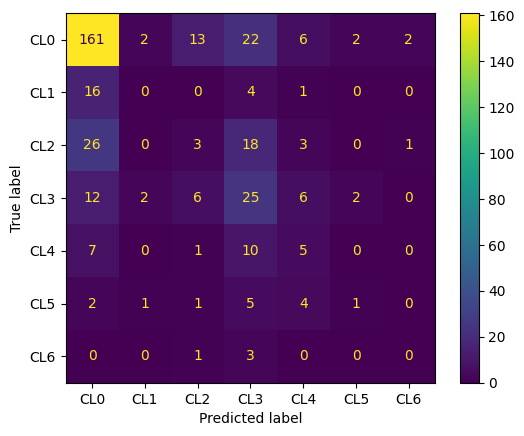

In [17]:
# Storing the target of interest for this project
y_drug_initial = drugConvEncode_df[drug_list[9]] 
print(y_drug_initial.value_counts())

# Storing the predictors
Xcat = drugConvEncode_df.iloc[:, :12]  

# Model Evaluation for Categorical Naive Bayes 
evaluation_CAT = modelNBgenerate(Xcat, y_drug_initial, CategoricalNB(),  0.2, 42) 

# Binary Classifcation

## Feature Engineering

In [18]:
# Due to class imbalances, we will group CL0 (Non-Users) vs CL1-CL6 (Users)
drugConvEncode_df_binary = drugConvEncode_df.copy()
for col in drug_list:
    drugConvEncode_df_binary[col] = drugConvEncode_df_binary[col].apply(lambda x: 0 if x == 'CL0' else 1)

In [19]:
# Quick preview of Binary Classes
drugConvEncode_df_binary.sample(5)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
366,1,0,8,5,6,36,25,22,28,19,...,1,1,0,0,1,0,0,1,0,1
181,2,0,7,5,6,27,28,18,31,29,...,0,0,0,0,0,0,0,0,0,0
1240,3,0,0,5,3,31,22,28,20,29,...,0,0,0,0,0,0,0,1,0,0
339,4,0,6,5,6,30,23,20,22,28,...,0,0,0,0,0,0,0,1,0,0
1352,0,1,4,6,6,26,10,23,26,13,...,1,0,1,1,1,1,1,1,0,0


# Helper Functions

## Naive Bayes (Binary Classification)

In [20]:
def modelNBgenerate_binary(predictors, target, model, tsize, rs, title):
    """
    Trains a Naive Bayes model for binary classification, evaluates its performance, and visualizes results.

    Parameters:
    predictors (pd.DataFrame): Feature dataset for training and testing.
    target (pd.Series): Target variable for binary classification.
    model: An instance of a Naive Bayes model.
    tsize (float): Proportion of the dataset to include in the test split.
    rs (integer): Random state for model
    title (str): Title for the confusion matrix plot.

    Returns:
    tuple: 
        precision (float): Precision score for the model.
        recall (float): Recall score for the model.
        accuracy (float): Accuracy score for the model.
        y_name (str): Name of the target variable.
        title (str): Title used for the confusion matrix plot.
        y_test (pd.Series): Actual target values from the test set.
        y_probs (np.ndarray): Predicted probabilities for the positive class.
        auc (float): Area Under the Receiver Operating Characteristic Curve (ROC AUC).
    """
    # Stores the target pandas dataframe
    y = target 
    # Stores the features pandas dataframe
    X = predictors 

    # Splitting our data to a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=rs) 

    # Stores the model method
    clf = model
    # Fit the model with our training data
    clf.fit(X_train, y_train) 

    # Create predictions based on the feature values
    y_pred = clf.predict(X_test) 
    # Predicted probabilities for the positive class (for binary classification)
    y_probs = clf.predict_proba(X_test)[:, 1] 

    # Report showing how well the model performed with predicted versus true classes
    report = classification_report(y_test, y_pred, output_dict=True) 
    # Extract the precision value from report
    precision = report['macro avg']['precision'] 
    # Extract the recall value from report
    recall = report['macro avg']['recall'] 
    # Extract accuracy value from report
    accuracy = report['accuracy'] 
    print(classification_report(y_test,y_pred))
    # Derive AUC score
    auc = roc_auc_score(y_test, y_probs)

    # Create the confusion matrix that shows where the calssication report values are derived
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(title + " - " + y.name)
    # Display the confusion matrix visual
    plt.show() 

    return precision, recall, accuracy, y.name, title, y_test, y_probs, auc

## SVM Model

In [21]:
def modelSVMgenerate(predictors, target, kernel, tsize, rs, title):
    """
    Trains a SVM model for binary classification, evaluates its performance, and visualizes results.

    Parameters:
    predictors (pd.DataFrame): Feature dataset for training and testing.
    target (pd.Series): Target variable for binary classification.
    kernel (str): Kernel to be used for SVM.
    tsize (float): Proportion of the dataset to include in the test split.
    rs (integer): Random state for model
    title (str): Title for the confusion matrix plot.

    Returns:
    tuple: 
        precision (float): Precision score for the model.
        recall (float): Recall score for the model.
        accuracy (float): Accuracy score for the model.
        y_name (str): Name of the target variable.
        title (str): Title used for the confusion matrix plot.
        y_test (pd.Series): Actual target values from the test set.
        y_probs (np.ndarray): Predicted probabilities for the positive class.
        auc (float): Area Under the Receiver Operating Characteristic Curve (ROC AUC).
    """
    # Stores the target pandas dataframe
    y = target 
    # Stores the features pandas dataframe
    X = predictors 

    # Splitting our data to a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, stratify=y, random_state=rs) 

    # Stores the model method
    clf = SVC(kernel=kernel, probability=True, random_state=rs)
    # Fit the model with our training data
    clf.fit(X_train, y_train) 
    
    # Create predictions based on the feature values
    y_pred = clf.predict(X_test) 
    # Predicted probabilities for the positive class (for binary classification)
    y_probs = clf.predict_proba(X_test)[:, 1] 

    # Report showing how well the model performed with predicted versus true classes
    report = classification_report(y_test, y_pred, output_dict=True) 
    # Extract the precision value from report
    precision = report['macro avg']['precision'] 
    # Extract the recall value from report
    recall = report['macro avg']['recall'] 
    # Extract accuracy value from report
    accuracy = report['accuracy'] 
    print(classification_report(y_test,y_pred))
    # Derive AUC score
    auc = roc_auc_score(y_test, y_probs)

    # Create the confusion matrix that shows where the calssication report values are derived
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(title + " - " + y.name)
    # Display the confusion matrix visual
    plt.show() 

    return precision, recall, accuracy, y.name, title, y_test, y_probs, auc

## Logistic Regression Model

In [22]:
def modelsLogisticRegression(predictors, target, tsize, reg, rs, solve, title):
    """
    Trains a Logistic Regression model for binary classification, evaluates its performance, and visualizes results.

    Parameters:
    predictors (pd.DataFrame): Feature dataset for training and testing.
    target (pd.Series): Target variable for binary classification.
    tsize (float): Proportion of the dataset to include in the test split.
    rs (integer): Random state for model
    title (str): Title for the confusion matrix plot.

    Returns:
    tuple: 
        precision (float): Precision score for the model.
        recall (float): Recall score for the model.
        accuracy (float): Accuracy score for the model.
        y_name (str): Name of the target variable.
        title (str): Title used for the confusion matrix plot.
        y_test (pd.Series): Actual target values from the test set.
        y_probs (np.ndarray): Predicted probabilities for the positive class.
        auc (float): Area Under the Receiver Operating Characteristic Curve (ROC AUC).
    """
    # Stores the target pandas dataframe
    y = target 
    # Stores the features pandas dataframe
    X = predictors
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=rs)

    # Initialize / train Logistic Regression
    clf = LogisticRegression(penalty=reg, random_state=rs, solver=solve, max_iter=1500)
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)
    y_probs = clf.predict_proba(X_test)[:, 1] 

    # Metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    # Extract the precision value from report
    precision = report["macro avg"]["precision"]
    # Extract the recall value from report
    recall = report["macro avg"]["recall"]
    # Extract the acurracy value from report
    accuracy = report["accuracy"]
    print(classification_report(y_test,y_pred))
    # Derive AUC score
    auc = roc_auc_score(y_test, y_probs)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(title + " - " + y.name)
    # Display the confusion matrix visual
    plt.show()

    return precision, recall, accuracy, y.name, title, y_test, y_probs, auc

## Perceptron Model

In [23]:
def modelsPerceptron(predictors, target, tsize, rs, title):
    """
    Trains a Perceptron model for binary classification, evaluates its performance, and visualizes results.

    Parameters:
    predictors (pd.DataFrame): Feature dataset for training and testing.
    target (pd.Series): Target variable for binary classification.
    tsize (float): Proportion of the dataset to include in the test split.
    rs (integer): Random state for model
    title (str): Title for the confusion matrix plot.

    Returns:
    tuple: 
        precision (float): Precision score for the model.
        recall (float): Recall score for the model.
        accuracy (float): Accuracy score for the model.
        y_name (str): Name of the target variable.
        title (str): Title used for the confusion matrix plot.
        y_test (pd.Series): Actual target values from the test set.
        y_probs (np.ndarray): Predicted probabilities for the positive class.
        auc (float): Area Under the Receiver Operating Characteristic Curve (ROC AUC).
    """
    # Stores the target pandas dataframe
    y = target 
    # Stores the features pandas dataframe
    X = predictors 
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=rs)

    # Initialize and train Perceptron
    clf = Perceptron(random_state=rs)
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)
    # Raw decision scores
    decision_scores = clf.decision_function(X_test)  
    # Apply sigmoid to get probabilities
    y_probs = 1 / (1 + np.exp(-decision_scores))  

    # Metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    # Extract the precision value from report
    precision = report["macro avg"]["precision"]
    # Extract the recall value from report
    recall = report["macro avg"]["recall"]
    # Extract the acurracy value from report
    accuracy = report["accuracy"]
    print(classification_report(y_test,y_pred))
    # Derive AUC score
    auc = roc_auc_score(y_test, y_probs)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_) 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(title + " - " + y.name)
    # Display the confusion matrix visual
    plt.show()

    return precision, recall, accuracy, y.name, title, y_test, y_probs, auc

In [24]:
def sumtable(model):
    """
    Returns a pandas dataframe of aggregrate performance data of the models implemented in this project
    
    Parameters:
    model (tuple): evaluation outputs of model

    Returns:
        Summary_Table (pd.DataFrame): DataFrame of evaluation metrics.
    """
    
    # Form dictionary
    Summary_Data = {
        'Model': model[4],
        'Drug': model[3],
        'Precision %': [round(Decimal(model[0]*100), 2)],
        'Recall %': [round(Decimal(model[1]*100), 2)],
        'Accuracy %': [round(Decimal(model[2]*100), 2)],
        'AUC Score %': [round(Decimal(model[7]*100), 2)],
        }
    
    # Create DataFrame
    Summary_Table = pd.DataFrame(data=Summary_Data)
    
    # Format DataFrame
    blankIndex=[''] * len(Summary_Table)
    Summary_Table.index=blankIndex
    
    return Summary_Table


In [25]:
def model_eval_all(tsize, rs, drug=None):
    """
    Trains all models in project and produces visuals/metrics

    Parameters:
    tsize (float): Proportion of the dataset to include in the test split.
    rs (integer): Random state for model
    drug (str): Specific drug to be evaluated, else randomized.

    Returns:
    tuple: 
        model_eval (dict): Dictionary of model metrics.
        df_concat (pd.DataFrame): Summary DataFrame of Models
    """
    if drug == None:
        # Storing the target of interest for this project, randomized
        y_drug = drugConvEncode_df_binary[drug_list[np.random.randint(len(drug_list))]] 
    else:
        try:
            # Find drug index in list
            idx_drug = drug_list.index(drug)
            # Storing the target of interest for this project, specified
            y_drug = drugConvEncode_df_binary[drug_list[idx_drug]] 
        except ValueError:
            print("Drug not found!")
    print(y_drug.value_counts())

    # Storing the predictors
    X = drugConvEncode_df_binary.iloc[:, :12]

    # Model Evaluation for Categorical Naive Bayes 
    eval_NB_CAT = modelNBgenerate_binary(X, y_drug, CategoricalNB(),  tsize, rs, 'Naive Bayes: Categorical') 
    # Model Evaluation for Complement Naive Bayes
    eval_NB_COM = modelNBgenerate_binary(X, y_drug, ComplementNB(),  tsize, rs, 'Naive Bayes: Complement')  
    
    # Model Evaluation for SVM Linear
    eval_SVM_lin = modelSVMgenerate(X, y_drug, 'linear',  tsize, rs, 'SVM: Linear') 
    # Model Evaluation for SVM Poly
    eval_SVM_poly = modelSVMgenerate(X, y_drug, 'poly',  tsize, rs, 'SVM: Polynomial') 
    # Model Evaluation for SVM RBF
    eval_SVM_rbf = modelSVMgenerate(X, y_drug, 'rbf',  tsize, rs, 'SVM: RBF')

    # Model Evaluation for Logistic Regression with L1 Regularization
    eval_LogReg_L1 = modelsLogisticRegression(X, y_drug, tsize, 'l1', rs, 'liblinear', 'Logistic Regression: L1 Regularization')
    # Model Evaluation for Logistic Regression with L2 Regularization
    eval_LogReg_L2 = modelsLogisticRegression(X, y_drug, tsize, 'l2', rs, 'lbfgs', 'Logistic Regression: L2 Regularization')
    
    # Model Evaluation for Perceptron
    eval_Perceptron = modelsPerceptron(X, y_drug, tsize, rs, 'Perceptron') 
    
    # Store evaluations in dictionary for AUC_ROC Curve
    model_eval = {
        'nbCat': eval_NB_CAT,
        'nbCom': eval_NB_COM,
        'svmLin': eval_SVM_lin,
        'svmPol': eval_SVM_poly,
        'svmRbf': eval_SVM_rbf,
        'logRegL1': eval_LogReg_L1,
        'logRegL2': eval_LogReg_L2,
        'percep': eval_Perceptron
    }

    # Initialize empty list for Summary DataFrame Formation
    all_dfs = []
    
    # Form Summary List
    for k in model_eval:
        df1 = sumtable(model_eval[k])
        all_dfs.append(df1)  
    # Concatenate to form DataFrame
    df_concat = pd.concat(all_dfs, axis=0)

    return model_eval, df_concat


In [26]:
def plot_auc_roc(y_true, y_prob, model, drug):
    """
    Plot AUC_RUC Cuvrves from trained models

    Parameters:
    y_test (pd.Series): Actual target values from the test set.
    y_probs (np.ndarray): Predicted probabilities for the positive class.
    model (idictionary): Model metrics
    drug (str): Specific drug to be evaluated, else randomized.

    Returns:
    auc (float): Area Under the Receiver Operating Characteristic Curve (ROC AUC).
    """
    # Compute AUC score
    auc = roc_auc_score(y_true, y_prob)
    # fpr = False Positive Rate and tpr = True Positive Rate
    fpr, tpr, _ = roc_curve(y_true, y_prob)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve" + f" | {model}" + f" - {drug}")
    plt.legend(loc="lower right")
    plt.show()
    
    return auc

In [27]:
def auc_roc_plotModel(model):
    """
    Plot AUC_RUC Curves from trained models, specifying inputs

    Parameters:
    model (dictionary): Model metrics

    Returns:
    None
    """
    # Extract model outputs
    drug, modelName, y_test, y_probs = model[3], model[4], model[5], model[6] 
    plot_auc_roc(y_test, y_probs, modelName, drug)

# Evaluation

In [28]:
# Initialize empty list to store class size differences
class_diff = []
for d in drug_list:
    y_drug_class_counts = drugConvEncode_df_binary[d]
    class_diff.append(np.abs(y_drug_class_counts.value_counts()[1] - y_drug_class_counts.value_counts()[0]))

# Find which drugs to consider for evaluation
drug_bal = drug_list[np.argmin(class_diff)]
print(f'Least Imbalanced Drug: {drug_bal}')
drug_imb = drug_list[np.argmax(class_diff)]
print(f'Most Imbalanced Drug: {drug_imb}')


Least Imbalanced Drug: Amphet
Most Imbalanced Drug: Semer


## Confusion Matrices and Reports

### Balanced Data

Amphet
0    970
1    896
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       254
           1       0.64      0.70      0.67       213

    accuracy                           0.68       467
   macro avg       0.68      0.68      0.68       467
weighted avg       0.69      0.68      0.68       467



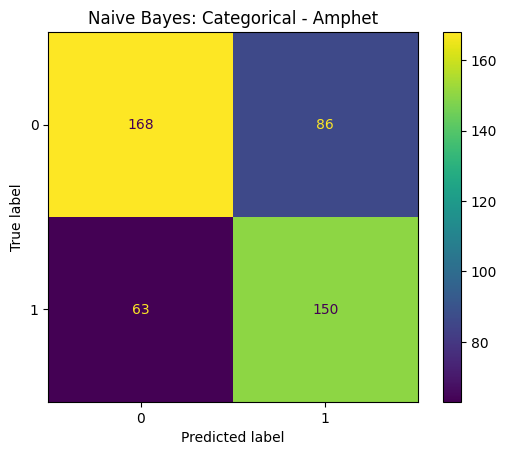

              precision    recall  f1-score   support

           0       0.70      0.65      0.67       254
           1       0.62      0.68      0.64       213

    accuracy                           0.66       467
   macro avg       0.66      0.66      0.66       467
weighted avg       0.66      0.66      0.66       467



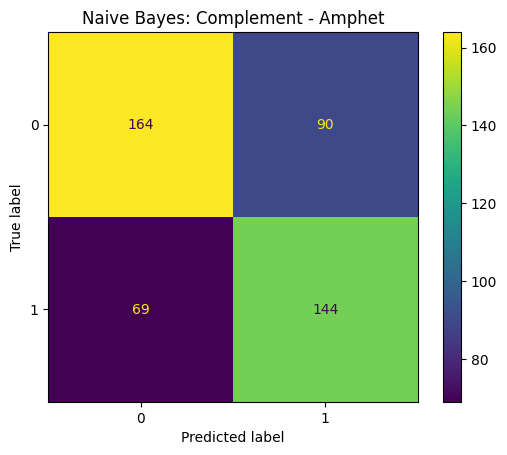

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       243
           1       0.69      0.67      0.68       224

    accuracy                           0.70       467
   macro avg       0.70      0.70      0.70       467
weighted avg       0.70      0.70      0.70       467



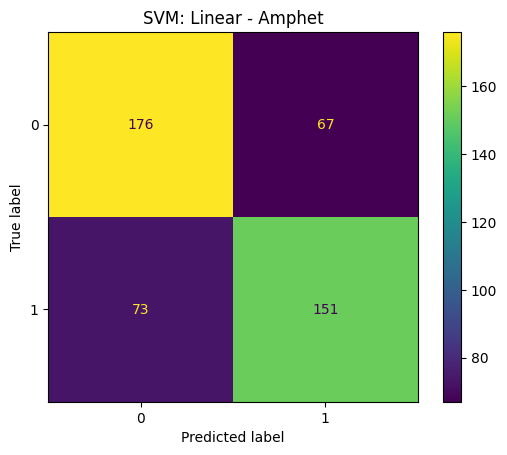

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       243
           1       0.64      0.72      0.68       224

    accuracy                           0.67       467
   macro avg       0.68      0.67      0.67       467
weighted avg       0.68      0.67      0.67       467



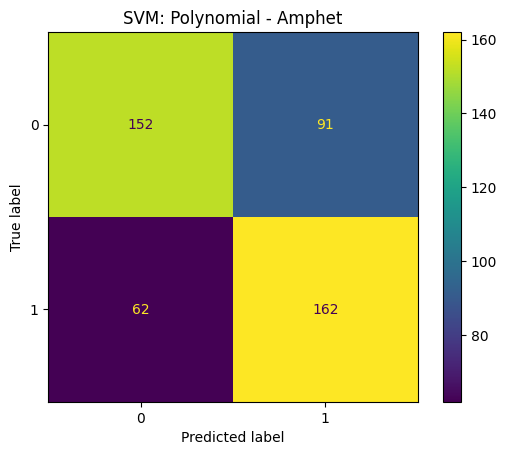

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       243
           1       0.65      0.75      0.70       224

    accuracy                           0.69       467
   macro avg       0.69      0.69      0.69       467
weighted avg       0.69      0.69      0.69       467



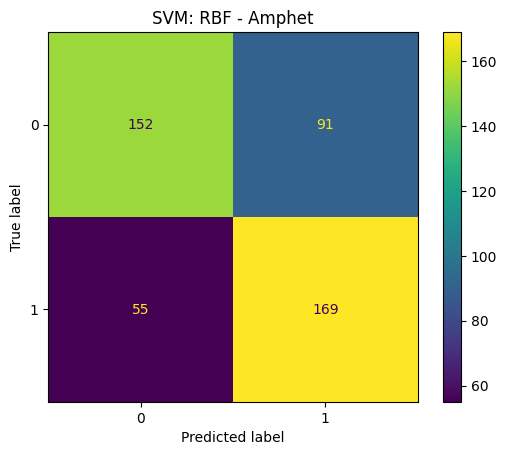

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       254
           1       0.64      0.63      0.64       213

    accuracy                           0.67       467
   macro avg       0.67      0.67      0.67       467
weighted avg       0.67      0.67      0.67       467



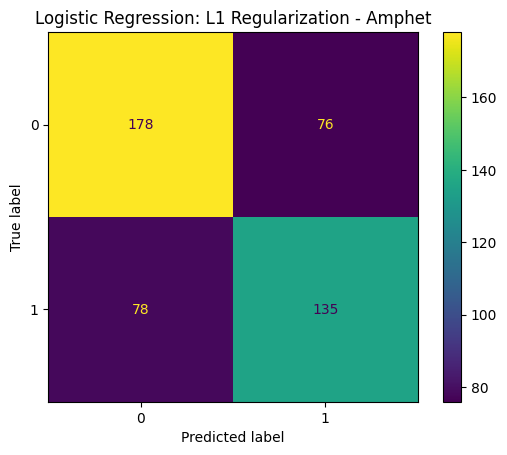

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       254
           1       0.64      0.64      0.64       213

    accuracy                           0.67       467
   macro avg       0.67      0.67      0.67       467
weighted avg       0.67      0.67      0.67       467



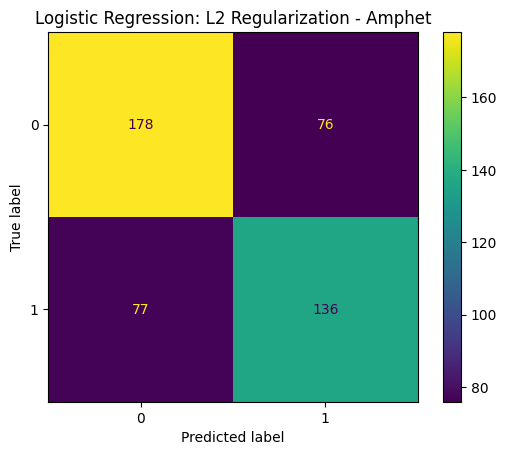

              precision    recall  f1-score   support

           0       0.55      0.98      0.70       254
           1       0.57      0.04      0.07       213

    accuracy                           0.55       467
   macro avg       0.56      0.51      0.39       467
weighted avg       0.56      0.55      0.41       467



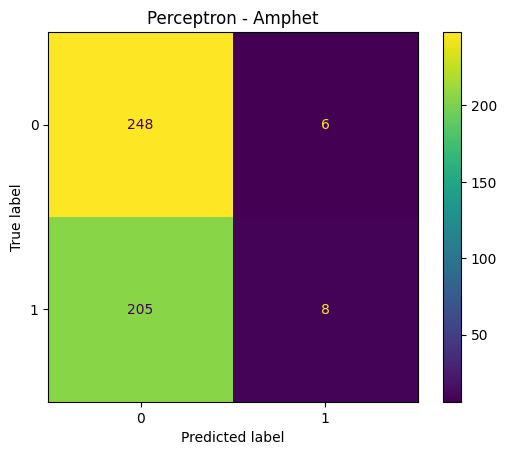

In [29]:
# Run Models for Most Balanced Drug
models_bal, scores_bal = model_eval_all(0.25, 42, drug_bal)

### Imbalanced Data

Semer
0    1859
1       7
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       464
           1       0.00      0.00      0.00         3

    accuracy                           0.99       467
   macro avg       0.50      0.50      0.50       467
weighted avg       0.99      0.99      0.99       467



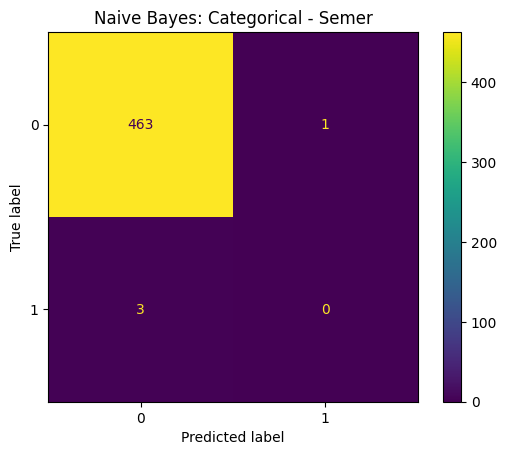

              precision    recall  f1-score   support

           0       1.00      0.69      0.82       464
           1       0.01      0.67      0.03         3

    accuracy                           0.69       467
   macro avg       0.51      0.68      0.42       467
weighted avg       0.99      0.69      0.81       467



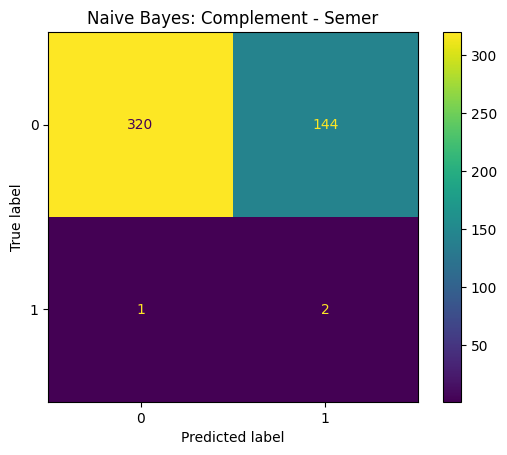

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       465
           1       0.00      0.00      0.00         2

    accuracy                           1.00       467
   macro avg       0.50      0.50      0.50       467
weighted avg       0.99      1.00      0.99       467



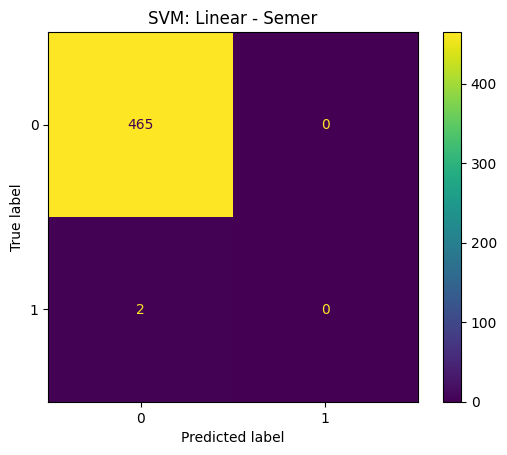

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       465
           1       0.00      0.00      0.00         2

    accuracy                           1.00       467
   macro avg       0.50      0.50      0.50       467
weighted avg       0.99      1.00      0.99       467



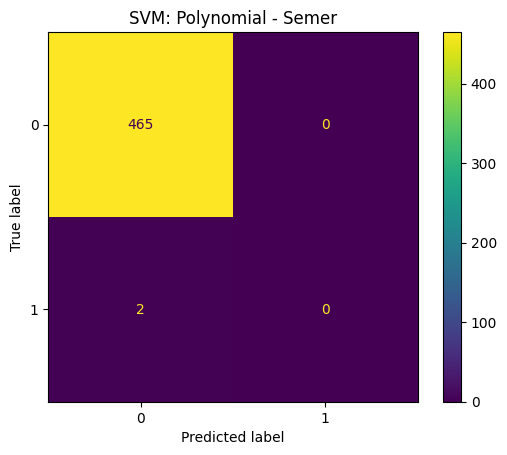

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       465
           1       0.00      0.00      0.00         2

    accuracy                           1.00       467
   macro avg       0.50      0.50      0.50       467
weighted avg       0.99      1.00      0.99       467



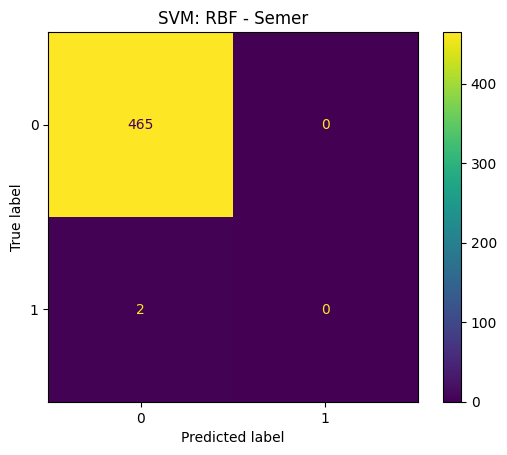

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       464
           1       0.00      0.00      0.00         3

    accuracy                           0.99       467
   macro avg       0.50      0.50      0.50       467
weighted avg       0.99      0.99      0.99       467



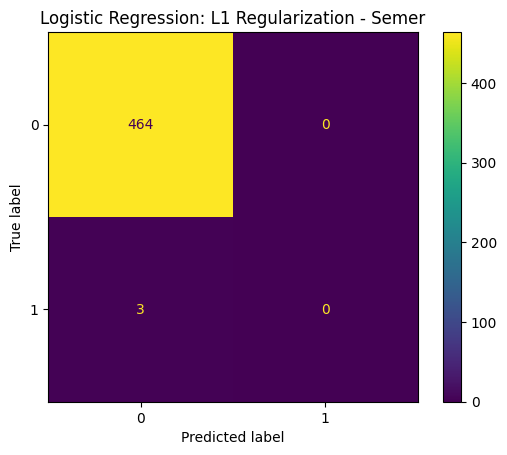

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       464
           1       0.00      0.00      0.00         3

    accuracy                           0.99       467
   macro avg       0.50      0.50      0.50       467
weighted avg       0.99      0.99      0.99       467



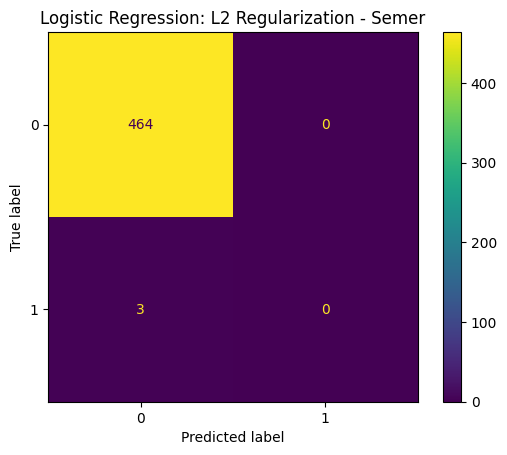

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       464
           1       0.00      0.00      0.00         3

    accuracy                           0.99       467
   macro avg       0.50      0.50      0.50       467
weighted avg       0.99      0.99      0.99       467



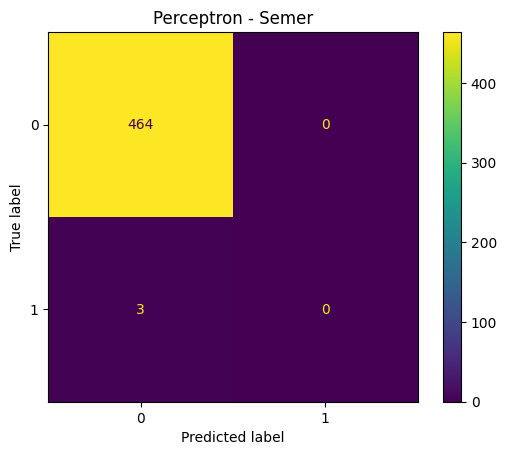

In [ ]:
# Run Models for Imbalanced Drug
models_imb, scores_imb = model_eval_all(0.25, 42, drug_imb)

## AUC-ROC Curves

### Balanced

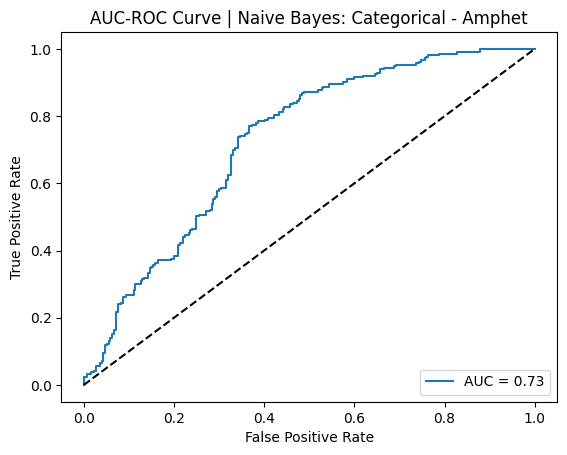

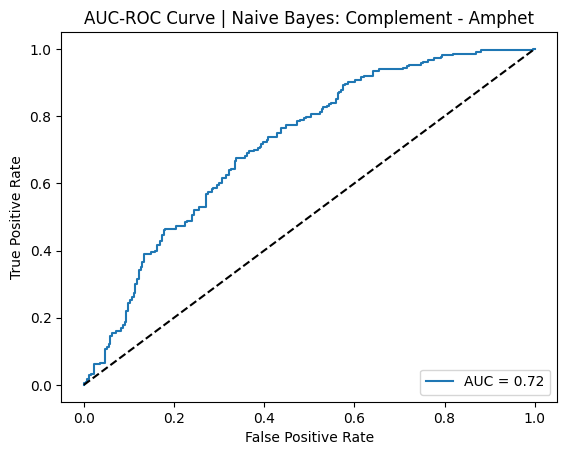

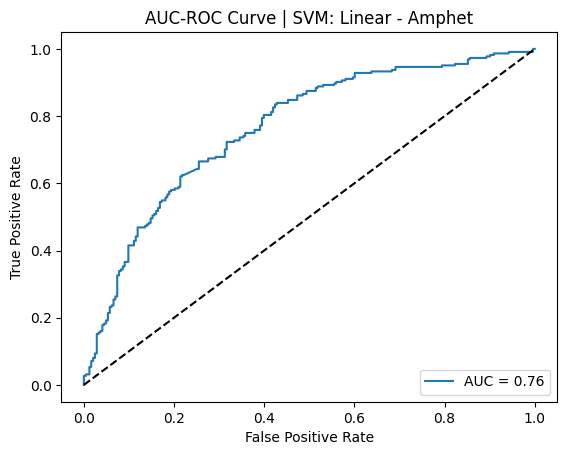

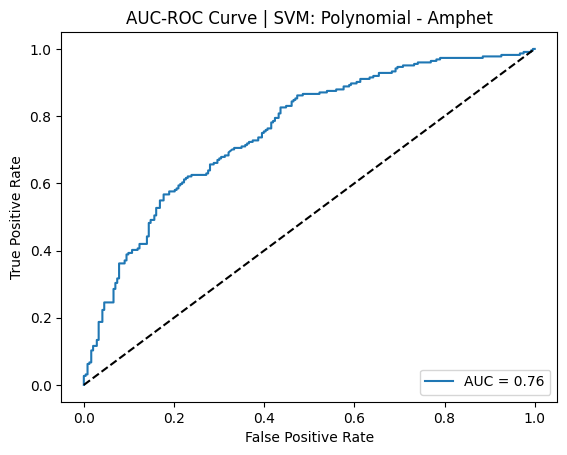

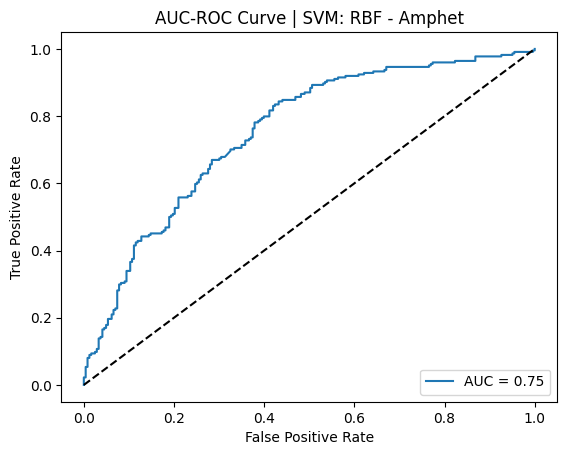

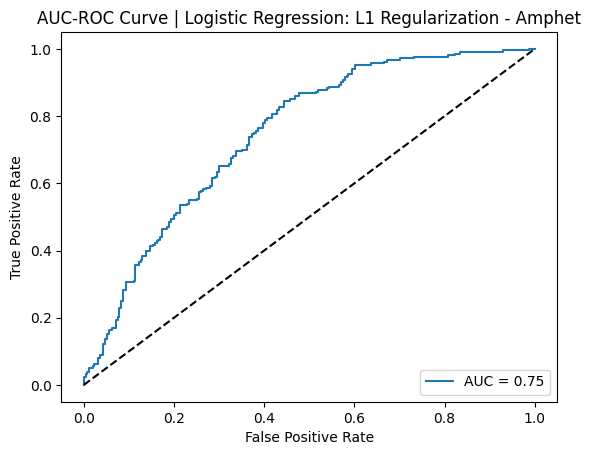

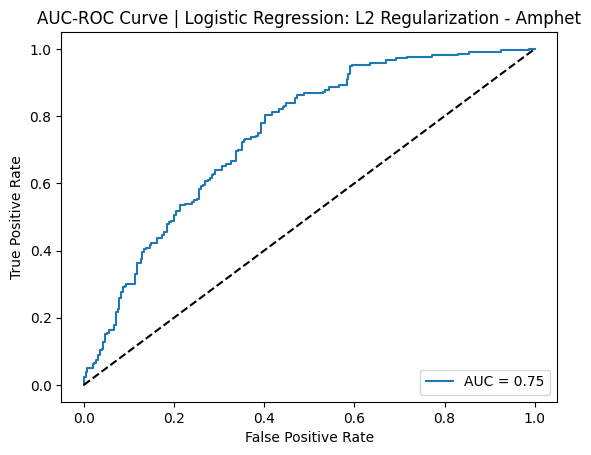

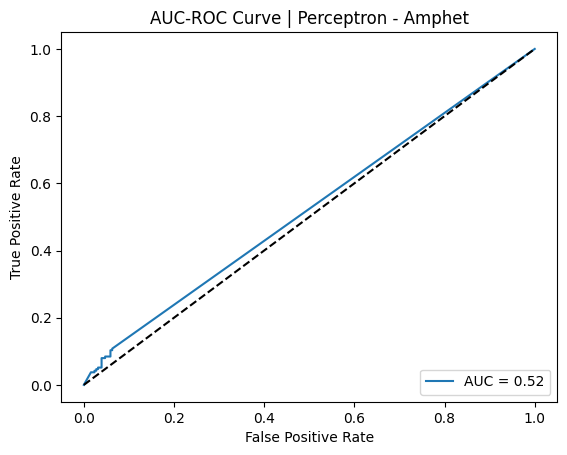

In [ ]:
# AUC-ROC Plots for Balanced Data
for k in models_bal.keys():
    auc_roc_plotModel(models_bal[k])

### Imbalanced Data

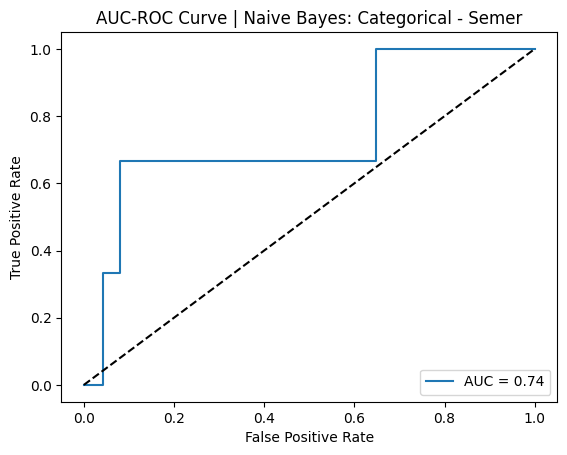

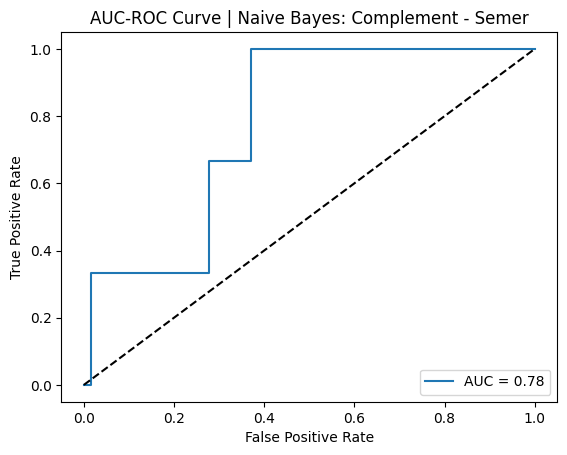

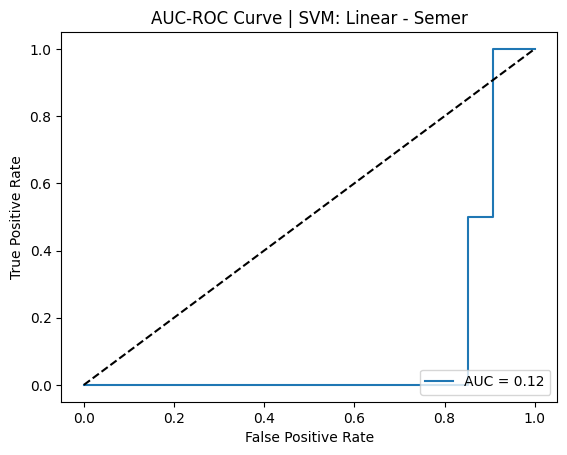

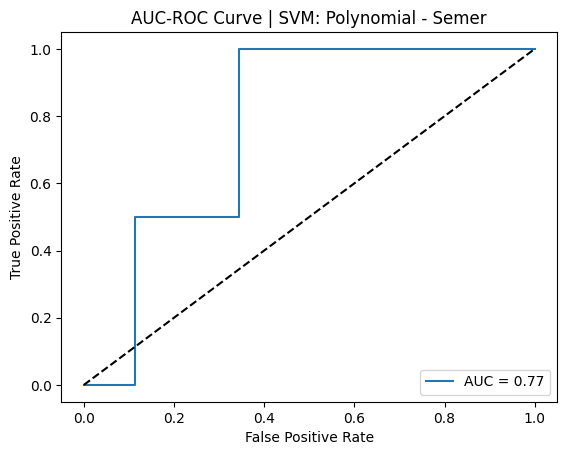

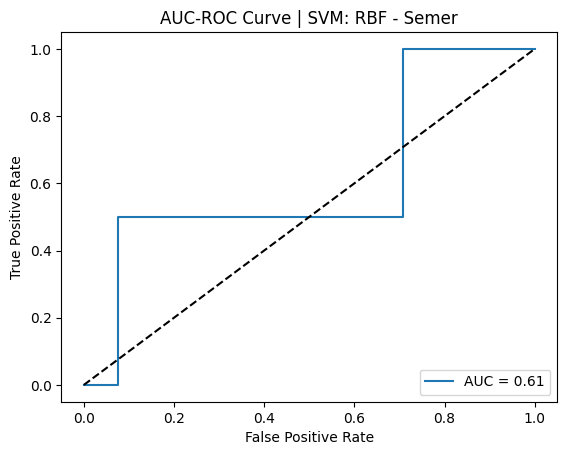

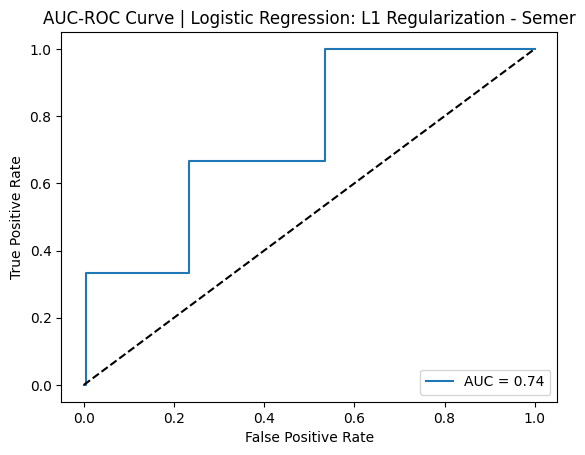

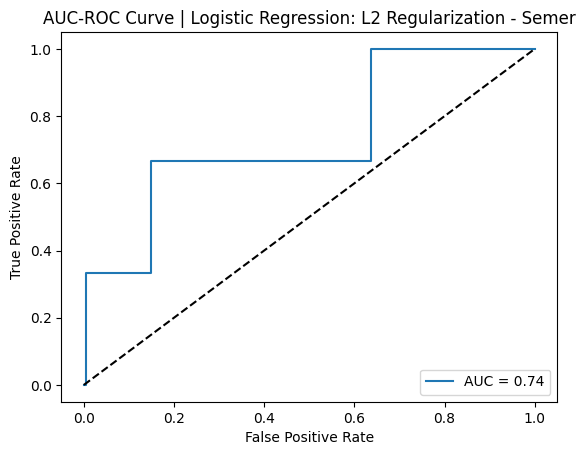

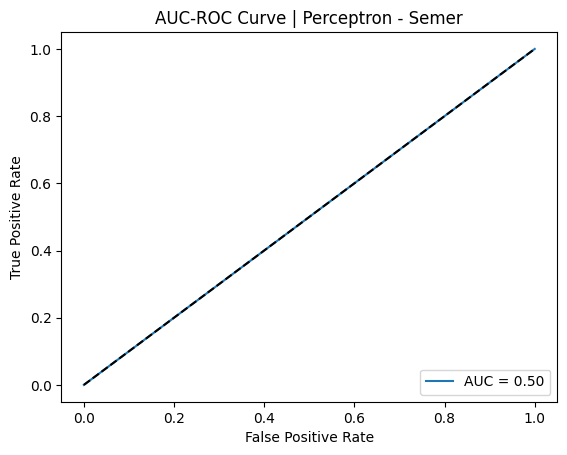

In [ ]:
# AUC-ROC Plots for Imbalanced Data
for k in models_imb.keys():
    auc_roc_plotModel(models_imb[k])

## Summary Tables

### Balanced Data

In [ ]:
# Summary table for Balanced Data
scores_bal

,Model,Drug,Precision %,Recall %,Accuracy %,AUC Score %
,Naive Bayes: Categorical,Amphet,68.14,68.28,68.09,72.62
,Naive Bayes: Complement,Amphet,65.96,66.09,65.95,71.59
,SVM: Linear,Amphet,69.97,69.92,70.02,76.43
,SVM: Polynomial,Amphet,67.53,67.44,67.24,75.73
,SVM: RBF,Amphet,69.21,69.00,68.74,75.33
,Logistic Regression: L1 Regularization,Amphet,66.76,66.73,67.02,74.56
,Logistic Regression: L2 Regularization,Amphet,66.98,66.96,67.24,74.70
,Perceptron,Amphet,55.94,50.70,54.82,52.25


### Imbalanced Data

In [ ]:
# Summary table for Imbalanced Data
scores_imb

,Model,Drug,Precision %,Recall %,Accuracy %,AUC Score %
,Naive Bayes: Categorical,Semer,49.68,49.89,99.14,74.28
,Naive Bayes: Complement,Semer,50.53,67.82,68.95,77.87
,SVM: Linear,Semer,49.79,50.00,99.57,12.04
,SVM: Polynomial,Semer,49.79,50.00,99.57,77.10
,SVM: RBF,Semer,49.79,50.00,99.57,60.86
,Logistic Regression: L1 Regularization,Semer,49.68,50.00,99.36,74.28
,Logistic Regression: L2 Regularization,Semer,49.68,50.00,99.36,73.64
,Perceptron,Semer,49.68,50.00,99.36,50.00
